In [1]:
def bestc(xtr,ytr,yv,xv,vmin,vmax,k,m):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):

        tx_acerto_max = 0
        c = 2**p
#         print(np.dot(xtr.T,xtr)+c*np.eye(m))
        w = np.dot(np.linalg.inv(np.dot(xtr.T,xtr)+c*np.eye(m)),np.dot(xtr.T,ytr))

        Y_est = np.dot(xv,w)

        err_graph.append(np.linalg.norm(Y_est-yv))
        acerto = 0
#         Test
        for i in range(0,int(Nv)):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])

            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)



            if yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)

        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
#     print(err_graph)

    return c_graph,tx_graph,err_graph
    
# print(c_graph)
# print(tx_graph)

In [2]:
def bestc_refined(xtr,ytr,yv,xv,vmin,vmax,k,m):
    tx_graph = []
    c_graph = []
    err_graph = []
    for p in range(vmin,vmax,k):

        tx_acerto_max = 0
        c = p
#         print(np.dot(xtr.T,xtr)+c*np.eye(m))
        w = np.dot(np.linalg.inv(np.dot(xtr.T,xtr)+c*np.eye(m)),np.dot(xtr.T,ytr))

        Y_est = np.dot(xv,w)

        err_graph.append(np.linalg.norm(Y_est-yv))
        acerto = 0
        #Test
        for i in range(0,int(Nv)):
            #maximum value of each Y row
            max_value = max(Y_est[i,:])

            #Position of the max value in the Row
            indmax = np.where(Y_est[i,:]==max_value)



            if yv[i,indmax[0][0]]>0.5:
                acerto+=1

        tx_acerto = acerto/(Nv)

        if tx_acerto >= tx_acerto_max:
            tx_acerto_max  = tx_acerto
            c_min  = c
            w_min = w
            tx_graph.append(tx_acerto_max) 
            c_graph.append(c_min)
#     print(err_graph)

    return c_graph,tx_graph,err_graph
    
# print(c_graph)
# print(tx_graph)

In [3]:
import numpy as np
import sklearn
import scipy.io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('data.mat')
test = scipy.io.loadmat('test.mat')

X = data['X']

X0 = np.ones((1,X.shape[0]))
print(X0.T.shape)
print(X.shape)
X0 = X0.T
X = np.hstack((X0,X))

print(X.shape)

Y = data['S']

Xt = test['Xt']

# print(Xt0.T.shape)
# print(Xt.shape)


Xt0 = np.ones((1,Xt.shape[0]))
Xt0 = Xt0.T
Xt = np.hstack((Xt0,Xt))


Yt = test['St']

# N, m = X.shape
# Nt, mt = Xt.shape

Xtr, Xv, Ytr, Yv = train_test_split(X, Y, test_size=0.2, random_state=42)

Nv,mv = Xv.shape
print(Xt.shape)

# print(X.shape)


(60000, 1)
(60000, 784)
(60000, 785)
(10000, 785)


In [106]:
np.random.seed(42)

W = np.random.normal(scale=0.001 ,size = (1100, X.shape[1]))

In [107]:
htr = np.dot(Xtr,W.T)
print(htr.shape)

htr0 = np.ones((1,htr.shape[0]))
print(htr0.T.shape)
htr0 = htr0.T
htr = np.hstack((htr0,htr))

# print(htr.shape)

hv = np.dot(Xv,W.T)
# print(hv.shape)


hv0 = np.ones((1,hv.shape[0]))

hv0 = hv0.T
hv = np.hstack((hv0,hv))

(48000, 1100)
(48000, 1)


In [108]:
Htr = np.copy(htr)

for i in range(htr.shape[0]):
    for j in range(htr.shape[1]):
        if htr[i,j]>=0:
            Htr[i,j] = htr[i,j]
        else:
            Htr[i,j] = 0.1*htr[i,j]
            
Hv = np.copy(hv)

for i in range(hv.shape[0]):
    for j in range(hv.shape[1]):
        if hv[i,j]>=0:
            Hv[i,j] = hv[i,j]
        else:
            Hv[i,j] = 0.1*hv[i,j]            
            
            
# print(h[:10,:10])
# print(H[:10,:10])

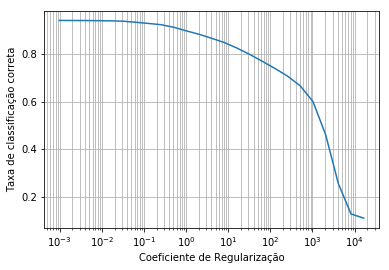

0.9406666666666667
Max value of c: 0.0009765625


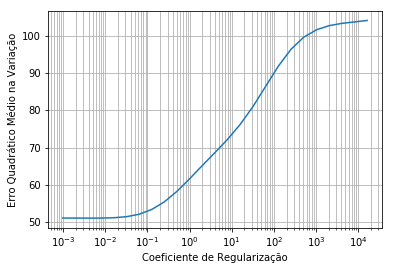

0.11016666666666666
Min value of err: 0.00390625


In [109]:
c, t, err = bestc(Htr,Ytr,Yv,Hv,-10,15,1,1101)
plt.grid(True, which="both")
plt.semilogx(c,t)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Taxa de classificação correta')
plt.show()
print(max(t))
t_max = max(t)
idx_max = t.index(t_max)
print('Max value of c:',c[idx_max] )
plt.grid(True, which="both")
plt.semilogx(c,err)
plt.xlabel('Coeficiente de Regularização')
plt.ylabel('Erro Quadrático Médio na Variação')
plt.show()
print(min(t))
err_min = min(err)
idx_min = err.index(err_min)
print('Min value of err:', c[idx_min])



In [92]:
tt  = [0.9118, 0.9211, 0.9268, 0.9313, 0.9364, 0.9390, 0.9406]
tt = [x*100 for x in tt]
et  = [0.8862, 0.8946, 0.8997, 0.9068, 0.9095, 0.91325, 0.9164]
nt  = [500, 600, 700, 800, 900, 1000, 1100]


tt2 = [ 0.9118, 0.9119, 0.9119, 0.9118, 0.9118]
tt2 = [x*100 for x in tt2]
et2 = [ 0.8862, 0.8592, 0.8247, 0.723, 0.1102]
dt2 = [ 0.2, 0.1, 0.05, 0.01, 0.001]


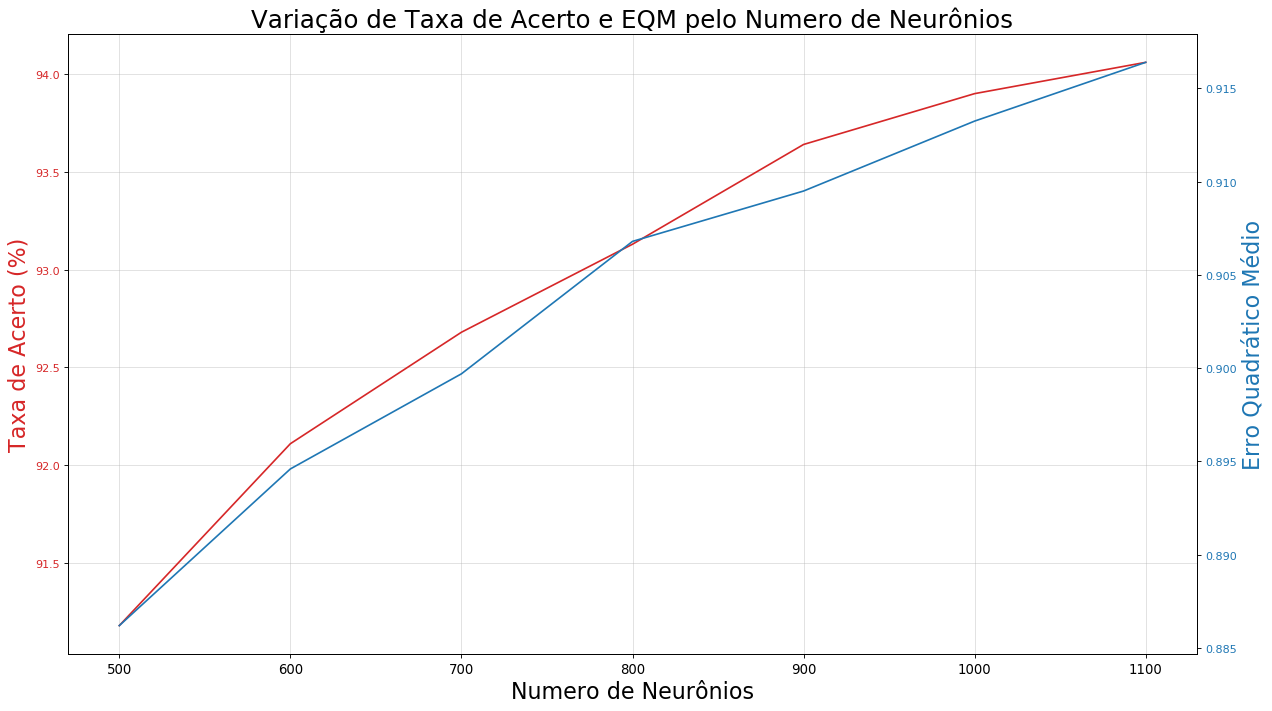

In [96]:
# plt.grid(True, which="both")

fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(nt, tt, color='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(nt, et, color='tab:blue')


ax1.set_xlabel('Numero de Neurônios', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Taxa de Acerto (%)', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)



ax2.set_ylabel("Erro Quadrático Médio", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')


ax2.set_title("Variação de Taxa de Acerto e EQM pelo Numero de Neurônios", fontsize=22)
fig.tight_layout()
plt.show()


NameError: name 'alpha' is not defined

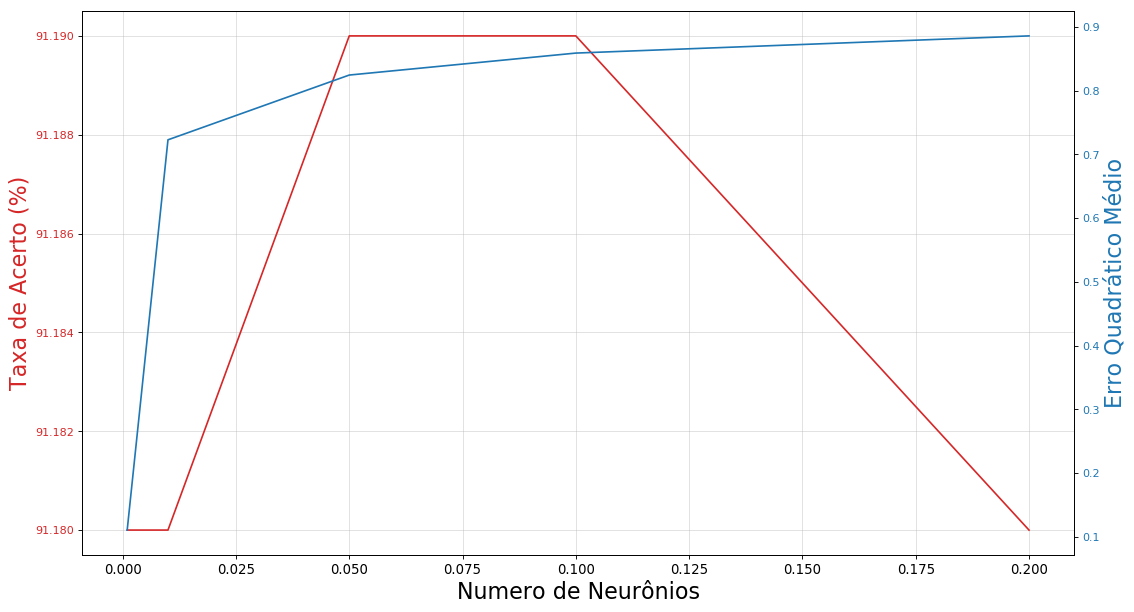

In [105]:
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(dt2, tt2, color='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(dt2, et2, color='tab:blue')


ax1.set_xlabel('Numero de Neurônios', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Taxa de Acerto (%)', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)



ax2.set_ylabel("Erro Quadrático Médio", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Variação de Taxa de Acerto e EQM pelo Numero de Neurônios", fontsize=22)
fig.tight_layout()
plt.show()